<a href="https://colab.research.google.com/github/Bhupendra-glitch/Customer-Segmentation-Retention/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This dataset is taken from** Kaggle** - Telco Customer Churn is a classification Problem.

Customer Churn, in simple words can be defined as losing an existing customer to a competitor. It's widely calcuted in terms of percentages of total customers of previous quarter's. Customer Churn is a very common problem across multiple industries such as Telecom, Banking, Retail, Fashion etc.

The Telco Dataset has various features such as bold textGender, MonthlyCharges, InternetService, PaymentMethod etc along with out Target Variable Churn (Yes (Churned) or No (Not Churned)). Our end goal is to predict whoever Customers are going to churn..

Let's get started...

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC


In [ ]:
df=pd.read_csv('/content/Telco Customer Churn.csv')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


looks like the dataset has no na vales..

In [ ]:
df[df.Churn=='Yes'].shape[0]/df[df.Churn=='No'].shape[0]

0.36122922303826827

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#TotalCharges is not present above, let's seedtype of TotalCharges column

In [ ]:
np.dtype(df.TotalCharges)

dtype('O')

In [ ]:
# let's convert it to the Numeric type

In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
#By looking at the above error, we can understand the reason behind the dtype('o')

len(df[df.TotalCharges==' ']) #We have 11 records with Total Charges value -> ' ' and all these rows have Churn value 'NO', let's remove these rows from our analysis (Having information on Churned customers is more important than info on unchurned records)
df=df[df.TotalCharges!=' ']

df.TotalCharges=pd.to_numeric(df.TotalCharges)
np.dtype(df.TotalCharges)


/tmp/ipython-input-1182861895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


dtype('float64')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Ideally SeniorCitizen column should be a factor, so let's convert 0,1 to Yes and No, and later we can label encode all factor columns
df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df.SeniorCitizen.value_counts()

/tmp/ipython-input-3804826887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')


,count
SeniorCitizen,
No,5890
Yes,1142


In [ ]:
# So here we convert all the 0,1 to yes and No

In [ ]:
# df.MultipleLines.value_counts()
# df.DeviceProtection.value_counts()
# df.OnlineBackup.value_counts()
# df.OnlineSecurity.value_counts()
# df.StreamingMovies.value_counts()
# df.StreamingTV.value_counts()
# df.TechSupport.value_counts()

In [ ]:
cat_cols_for_wrangling=['MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','InternetService']

In [ ]:
# Some data wrangling.. We will convert values like 'No Phone Service', 'No Internet Service' to 'No', in the Other Words, we'r creating binary column (Yes and No)
for col in cat_cols_for_wrangling:
  df[col]=df[col].apply(lambda x:'No' if 'No' in x else 'Yes')

/tmp/ipython-input-4185287369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(lambda x:'No' if 'No' in x else 'Yes')


In [ ]:
cols=df.columns
cols=cols.drop(['customerID','MonthlyCharges','TotalCharges'])
all_cat_cols=list(cols) #All the categorical features that are required for analysis, we'll remove customerID since it's just an ID column with no significance for the analysis

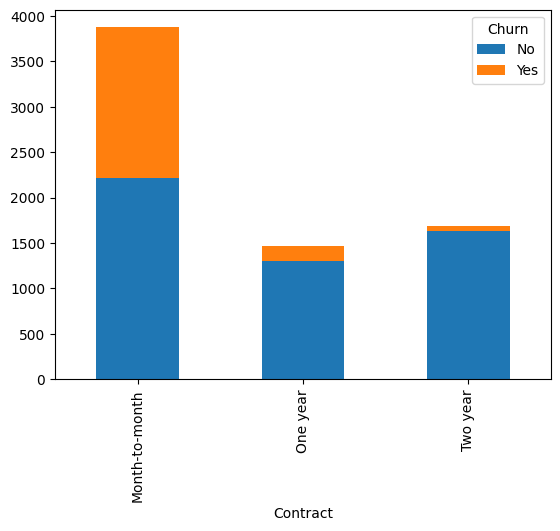

In [ ]:
df.groupby(['Contract','Churn']).size().unstack().plot(kind='bar',stacked=True); #Clearly, users with Month-to-Month contract are more likely to churn

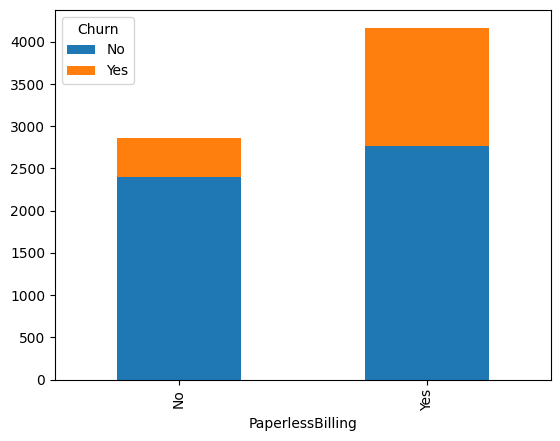

In [ ]:
df.groupby(['PaperlessBilling','Churn']).size().unstack().plot(kind='bar',stacked=True);

In [ ]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:
#It makes more sense to categories customers wrt tenure, so let's  convert to tenure range/buckets


In [ ]:
def convert_to_buckets(tenure):
  if tenure <=24:
    return '0 - 24 months'
  elif tenure <=36:
    return '24 - 36 months'
  elif tenure <=48:
    return '36 - 48 months'
  elif tenure <=60:
    return '48 - 60 months'
  else:
    return '> 60 months'

In [ ]:
df['tenure']=df['tenure'].map(convert_to_buckets)
df['tenure'].value_counts()

/tmp/ipython-input-3150989233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure']=df['tenure'].map(convert_to_buckets)


,count
tenure,
0 - 24 months,3199
> 60 months,1407
24 - 36 months,832
48 - 60 months,832
36 - 48 months,762


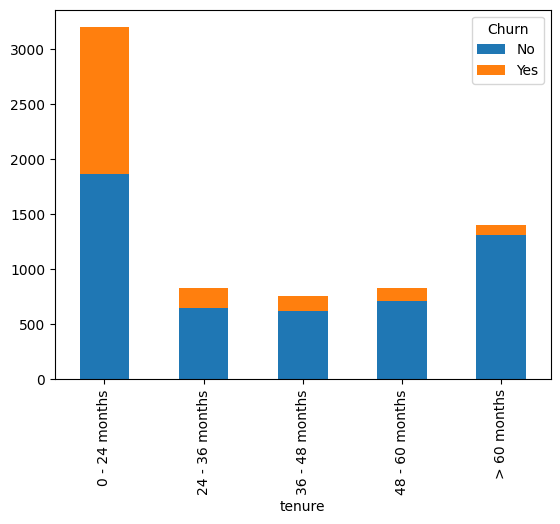

In [ ]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True); #customers with 0-24 months tenure are more likely to churn..
#From the plot, it is evident that 'tenure' is an important feature as well./

NameError: name 'df' is not defined

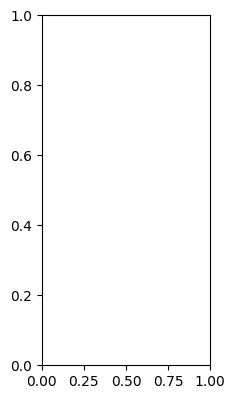

In [23]:
import matplotlib.pyplot as plt
f=plt.figure(figsize=(10,10));
for i in range(7):
    f.add_subplot(2,4,i+1)
    df[all_cat_cols[i]].value_counts(normalize=True).plot(kind='bar',title=all_cat_cols[i])
plt.subplots_adjust(left=3,right=5,top=3,bottom=2,wspace = 0.4,hspace = 0.4)

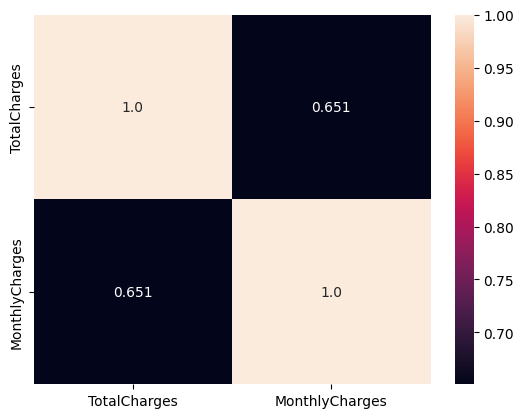

In [ ]:
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them, let's remove TotalCharges..

In [26]:
print(f"'df' is defined: {('df' in locals() or 'df' in globals())}")
if 'df' in locals() or 'df' in globals():
    print(f"Type of df: {type(df)}")
    print("First 5 rows of df:")
    display(df.head())

print(f"'all_cat_cols' is defined: {('all_cat_cols' in locals() or 'all_cat_cols' in globals())}")
if 'all_cat_cols' in locals() or 'all_cat_cols' in globals():
    print(f"Type of all_cat_cols: {type(all_cat_cols)}")
    print(f"all_cat_cols: {all_cat_cols}")

'df' is defined: False
'all_cat_cols' is defined: False


In [27]:
all_cat_cols #All Categorical column names

NameError: name 'all_cat_cols' is not defined

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])


df[all_cat_cols].head()

NameError: name 'all_cat_cols' is not defined

Train - Test Data Split


In [29]:
#from sklearn.model_selection import train_test_split

X_train=df.sample(frac=0.8,random_state=199)
X_test=df.drop(X_train.index)
len(X_train),len(X_test)

NameError: name 'df' is not defined

In [11]:
Y_train=X_train['Churn']
Y_test=X_test['Churn']

NameError: name 'X_train' is not defined

In [12]:
#Monthly and TotalCharges are corelated, so we remove one of them, we're removing total charges

X_train.drop(columns=['Churn','customerID','TotalCharges'],axis=1,inplace=True)
X_test.drop(columns=['Churn','customerID','TotalCharges'],axis=1,inplace=True)

X_train.columns

NameError: name 'X_train' is not defined